<a href="https://colab.research.google.com/github/ashahdeen/MAIZE-CROP-DISEASE-IMAGE-CLASSIFICATION/blob/dev-branch/CNN_and_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount gogle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#keras libraries
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#libraries for loading images
from pathlib import Path
import pathlib
import PIL
import PIL.Image

import cv2
import os


In [ ]:
#path to get document from drive.
p = Path("/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images") 
#Getting the directory to the train,validation and test data
train_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/train'
valid_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/valid'
test_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test'
# downloading our dataset

data_dir= pathlib.Path(train_path)
data_dir

# The total number of images present
image_counts = len(list(data_dir.glob('*/*')))
print('Training data',image_counts)

Training data 3001


In [ ]:
# The total number of validation images present
data_dir_val= pathlib.Path(valid_path)

image_counts = len(list(data_dir_val.glob('Blight/*')))
print('Blight' , image_counts)
image_counts = len(list(data_dir_val.glob('healthy/*')))
print('Healthy' , image_counts)
image_counts = len(list(data_dir_val.glob('Common_rust/*')))
print('Common_rust' , image_counts)
image_counts = len(list(data_dir_val.glob('Gray_Leaf_Spot/*')))
print('Grey_leaf' , image_counts)
image_counts = len(list(data_dir_val.glob('SMUT500/*')))
print('smut' , image_counts)
image_counts = len(list(data_dir_val.glob('maizestreak_aug/*')))
print('maize_streak' , image_counts)

Blight 110
Healthy 110
Common_rust 110
Grey_leaf 110
smut 110
maize_streak 110


In [ ]:
# # The total number of test images present
data_dir_test= pathlib.Path(test_path)


image_counts = len(list(data_dir_test.glob('Blight/*')))
print('Blight' , image_counts)
image_counts = len(list(data_dir_test.glob('healthy/*')))
print('Healthy' , image_counts)
image_counts = len(list(data_dir_test.glob('Common_rust/*')))
print('Common_rust' , image_counts)
image_counts = len(list(data_dir_test.glob('Gray_Leaf_Spot/*')))
print('Grey_leaf' , image_counts)
image_counts = len(list(data_dir_test.glob('SMUT500/*')))
print('smut' , image_counts)
image_counts = len(list(data_dir_test.glob('maizestreak_aug/*')))
print('maize_streak' , image_counts)

Blight 30
Healthy 30
Common_rust 30
Grey_leaf 30
smut 30
maize_streak 30


###Data Preprocessing.


In [ ]:
#creating data and resizing our images
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Loading the image into a dataframe.
all_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3001 files belonging to 7 classes.


In [ ]:
#augment our image to largen the number of the dataset.

In [ ]:
#validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_val,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Traing data
#training set train_ds val_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Test Data
#training set train_ds val_ds
test_path = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 660 files belonging to 6 classes.
Found 3001 files belonging to 6 classes.
Found 180 files belonging to 6 classes.


In [ ]:
# Class name attributes on our dataset
class_names = train_ds.class_names
print(class_names)

['Blight', 'Common_rust', 'Gray Leaf Spot', 'SMUT500', 'healthy', 'maizestreak_aug']


In [ ]:
# Iterating over our dataset to retrieve images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
# import mxnet as mx 
# aug = mx.image.HorizontalFlipAug(p=1)
# aug_image = aug(Common_rust)
# plot_mx_array(aug_image)

# assert example_image.shape == (427, 640, 3)
# assert aug_image.shape == (427, 640, 3)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   train_path,
#   image_size=(224,224),
#   batch_size=10)
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   valid_path,
#   image_size=(224,224),
#   batch_size=10)

In [ ]:
# #augmentation.
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

In [ ]:
# #visualize image that has been augumented
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(2):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [ ]:
# Cache the data so that it is saved in the first epoch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Intergrate wandb

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

wandb.login()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## **Initial Baseline CNN Model**

Our number one concern should be **overfitting**. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions

* The main focus for fighting overfitting should be the **entropic capacity** of our model --how much information the model is allowed to store.
    * A model that can only store a few features will have to focus on the most significant features found in the data, and these are more likely to be truly relevant and to generalize better.
* One ways to modulate entropic capacity is the choice of the **number of parameters in your model**, i.e. number and size of each layer. 
* Another way is the **use of weight regularization**, such as L1 or L2 regularization, which consists in forcing model weights to taker smaller values.
* **Dropout** also helps reduce overfitting, by preventing a layer from seeing twice the exact same pattern, thus acting in a way analoguous to data augmentation

In [ ]:
# Libraries for the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
# #Building our baseline model
# #Compile the the model
# num_classes = 6

# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dropout(0.5),
#   layers.Dense(num_classes)
# ])

### Initialize your wandb run

In [ ]:
# # Initialize wandb with your project name
# run = wandb.init(project='CNN Classification Model',save_code= True, name='baseline_CNN_bal',
#                  config={  # and include hyperparameters and metadata
#                      "learning_rate": 0.0005,
#                      "epochs": 30,
#                      "batch_size": 2,
#                      "loss_function": "sparse_categorical_crossentropy", #CategoricalCrossentropy
#                      "architecture": "Base CNN Model",
#                      "dataset": "Maize Crop images"
#                  })
# config = wandb.config  # We'll use this to configure our experiment

# # Initialize model like you usually do.
# tf.keras.backend.clear_session()
# #model = Model()
# model.summary()

# # Compile model like you usually do.
# # Notice that we use config, so our metadata matches what gets executed
# optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
# model.compile(optimizer, config.loss_function, metrics=['acc'])

wandb: Currently logged in as: mo_g (use `wandb login --relogin` to force relogin)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [ ]:
# #fit the model
history = model.fit(train_ds,
          epochs=config.epochs, 
          batch_size=config.batch_size,
          validation_data=val_ds,
          callbacks=[WandbCallback()])

run.finish()

In [ ]:
# #Create plots of loss and accuracy on the training and validation sets

# acc = history.history['acc']
# val_acc = history.history['val_acc']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


## **MobileNet Transfer Learning**

### Data Preprocessing for MobileNet.


In [ ]:
# #creating data and resizing our images
# batch_size = 32
# img_height = 224
# img_width = 224

In [ ]:
# # Loading the image into a dataframe.
# all_data = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
#augment our image to largen the number of the dataset.

In [ ]:
# #validation set
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
# #training set train_ds val_ds
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
# # Class name attributes on our dataset
# class_names = train_ds.class_names
# print(class_names)

In [ ]:
# # Iterating over our dataset to retrieve images
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [ ]:
# # Cache the data so that it is saved in the first epoch
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Transfer Model

In [ ]:
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(1000)

In [ ]:
#Getting the directory to the train,validation and test data
train_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/train'
valid_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/valid'
test_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test'


#Preprocessing the data for MobileNet architecture

#Train data
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)


#Validation data
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)

#Test data
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 3000 images belonging to 6 classes.
Found 660 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [ ]:
#download the MobileNet model, and print a summary of it
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

* We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

* By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last global_average_pooling layer.

In [ ]:
#Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
#his setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has 88 layers total.

x = mobile.layers[-6].output

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 23 layers
for layer in model.layers[:-23]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_init_model',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 20,
                    "batch_size": 10,
                     "loss_function": "sparse_categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


#compile the model 
optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])

#training the model
# history = model.fit(x=train_batches,
#             steps_per_epoch=len(train_batches),
#             validation_data=valid_batches,
#             validation_steps=len(valid_batches),
#             epochs=config.epochs,
#             verbose=2
# )


# #fit the model
history = model.fit(train_ds,
          epochs=config.epochs, 
          batch_size=config.batch_size,
          validation_data=val_ds,
          callbacks=[WandbCallback()])

run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
94/94 [==============================] - 382s 867ms/step - loss: 0.8005 - acc: 0.7088 - val_loss: 2.0251 - val_acc: 0.5833
Epoch 2/20
94/94 [==============================] - 10s 109ms/step - loss: 0.2606 - acc: 0.9347 - val_loss: 0.7625 - val_acc: 0.7318
Epoch 3/20
94/94 [==============================] - 10s 109ms/step - loss: 0.1230 - acc: 0.9850 - val_loss: 0.6749 - val_acc: 0.7515
Epoch 4/20
94/94 [==============================] - 10s 110ms/step - loss: 0.0670 - acc: 0.9940 - val_loss: 0.4685 - val_acc: 0.8348
Epoch 5/20
94/94 [==============================] - 10s 110ms/step - loss: 0.0421 - acc: 0.9977 - val_loss: 0.4573 - val_acc: 0.8500
Epoch 6/20
94/94 [==============================] - 10s 110ms/step - loss: 0.0290 - acc: 0.9987 - val_loss: 0.4648 - val_acc: 0.8485
Epoch 7/20
94/94 [==============================] - 10s 109ms/step - loss: 0.0212 - acc: 0.9997 - val_loss: 0.4762 - val_acc: 0.8530
Epoch 8/20
94/94 [==============================] - 10s 110ms/step -

acc,1.0
best_epoch,4
best_val_loss,0.45728
epoch,19
loss,0.00237
val_acc,0.86061
val_loss,0.51863


acc,▁▆██████████████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▅▇████████████████
val_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [ ]:
best_epoch_model = 'my_best_model.epoch{epoch:4}-loss{val_loss:.0.45728}.hdf5'
best_epoch_model

'my_best_model.epoch{epoch:4}-loss{val_loss:.0.45728}.hdf5'

#### **Optimization**

        * lower learning rate

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 23 layers
for layer in model.layers[:-30]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model 
optimizer = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model
history = model.fit(x=train_ds,
            steps_per_epoch=len(train_ds),
            validation_data=val_ds,
            validation_steps=len(val_ds),
            epochs=10,
            verbose=2
)


# #fit the model
# history = model.fit(train_ds,
#           epochs=config.epochs, 
#           batch_size=config.batch_size,
#           validation_data=val_ds,
#           callbacks=[WandbCallback()])

Epoch 1/10
94/94 - 12s - loss: 1.1849 - accuracy: 0.6724 - val_loss: 7.7125 - val_accuracy: 0.4227
Epoch 2/10
94/94 - 10s - loss: 0.4898 - accuracy: 0.8247 - val_loss: 8.2112 - val_accuracy: 0.4348
Epoch 3/10
94/94 - 10s - loss: 0.3676 - accuracy: 0.8694 - val_loss: 3.1756 - val_accuracy: 0.5742
Epoch 4/10
94/94 - 10s - loss: 0.2543 - accuracy: 0.9067 - val_loss: 4.3750 - val_accuracy: 0.5742
Epoch 5/10
94/94 - 10s - loss: 0.1709 - accuracy: 0.9380 - val_loss: 1.7284 - val_accuracy: 0.6485
Epoch 6/10
94/94 - 10s - loss: 0.1122 - accuracy: 0.9583 - val_loss: 5.5325 - val_accuracy: 0.4515
Epoch 7/10
94/94 - 10s - loss: 0.0861 - accuracy: 0.9703 - val_loss: 2.7514 - val_accuracy: 0.6197
Epoch 8/10
94/94 - 10s - loss: 0.0613 - accuracy: 0.9813 - val_loss: 2.3030 - val_accuracy: 0.6773
Epoch 9/10
94/94 - 10s - loss: 0.0805 - accuracy: 0.9717 - val_loss: 1.2680 - val_accuracy: 0.8136
Epoch 10/10
94/94 - 10s - loss: 0.0974 - accuracy: 0.9667 - val_loss: 4.5255 - val_accuracy: 0.6152


## Mobilenet 
    (Train/Validation/Test Split)
  
  [encoding](https://www.damienpontifex.com/posts/images-with-directories-as-labels-for-tensorflow-data/)

In [ ]:
# # Organize data into train, valid, test dirs  3076

# diseases = ['Blight', 'Common_rust', 'Gray Leaf Spot', 'SMUT500', 'healthy', 'maizestreak_aug']
# os.chdir('/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images')
# if os.path.isdir('train/0/') is False: 
#     os.mkdir('train')
#     os.mkdir('valid')
#     os.mkdir('test')

#     for i in diseases:
#         shutil.move(f'{i}', 'train')
#         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

#         valid_samples = random.sample(os.listdir(f'train/{i}'), 100)
#         for j in valid_samples:
#             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         test_samples = random.sample(os.listdir(f'train/{i}'), 20)
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('../..')

### MobileNet Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Transfer Model

In [ ]:
#download the MobileNet model
mobile = tf.keras.applications.mobilenet.MobileNet()

#summary of the model
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

* We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

* By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last global_average_pooling layer.

In [ ]:
#Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
#his setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has 88 layers total.

x = mobile.layers[-6].output

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 10,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
300/300 - 27s - loss: 2.9065 - acc: 0.5413 - val_loss: 2.3655 - val_acc: 0.5894
Epoch 2/10
300/300 - 24s - loss: 2.0343 - acc: 0.6047 - val_loss: 1.8220 - val_acc: 0.6470
Epoch 3/10
300/300 - 23s - loss: 1.5752 - acc: 0.6447 - val_loss: 1.4622 - val_acc: 0.6848
Epoch 4/10
300/300 - 23s - loss: 1.2238 - acc: 0.6803 - val_loss: 1.2107 - val_acc: 0.7015
Epoch 5/10
300/300 - 23s - loss: 0.9648 - acc: 0.7240 - val_loss: 1.0114 - val_acc: 0.7333
Epoch 6/10
300/300 - 23s - loss: 0.8110 - acc: 0.7503 - val_loss: 0.8784 - val_acc: 0.7485
Epoch 7/10
300/300 - 23s - loss: 0.6898 - acc: 0.7777 - val_loss: 0.7587 - val_acc: 0.7667
Epoch 8/10
300/300 - 23s - loss: 0.6156 - acc: 0.7937 - val_loss: 0.6719 - val_acc: 0.7742
Epoch 9/10
300/300 - 23s - loss: 0.5492 - acc: 0.8127 - val_loss: 0.6176 - val_acc: 0.7955
Epoch 10/10
300/300 - 23s - loss: 0.5249 - acc: 0.8190 - val_loss: 0.5723 - val_acc: 0.8015


acc,0.819
best_epoch,9
best_val_loss,0.57235
epoch,9
loss,0.52492
val_acc,0.80152
val_loss,0.57235


acc,▁▃▄▅▆▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
val_acc,▁▃▄▅▆▆▇▇██
val_loss,█▆▄▃▃▂▂▁▁▁


### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model')

cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
wandb.log({'confusion_matrix':cm})

wandb.finish()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

{'Blight': 0,
 'Common_rust': 1,
 'Gray Leaf Spot': 2,
 'SMUT500': 3,
 'healthy': 4,
 'maizestreak_aug': 5}

Confusion matrix, without normalization
[[18  2  5  2  0  3]
 [ 0 19  3  2  1  5]
 [ 6  2 22  0  0  0]
 [ 1  0  0 25  0  4]
 [ 0  0  0  0 30  0]
 [ 1  1  1  3  1 23]]


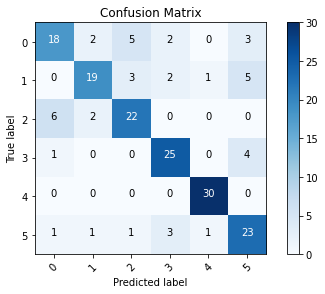

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.69      0.60      0.64        30
           1       0.79      0.63      0.70        30
           2       0.71      0.73      0.72        30
           3       0.78      0.83      0.81        30
           4       0.94      1.00      0.97        30
           5       0.66      0.77      0.71        30

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180



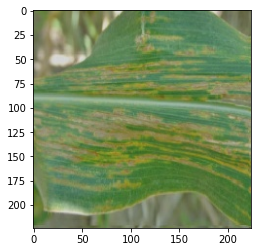

In [ ]:
# make a prediction with the test dataset
for images_batch, labels_batch in test_path.take(1):

  plt.imshow(images_batch[0].numpy().astype('uint8')) # print(images_batch[0]) returns tensors. Use .numpy() to change to numpy

First image to predict
Actual label: Common_rust
Predicted label: Blight


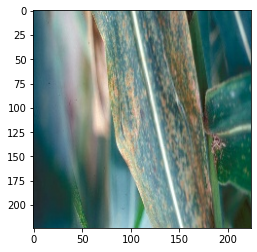

In [ ]:
# Import numpy
import numpy as np

# make a prediction with the test dataset
for images_batch, labels_batch in test_path.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label:", class_names[first_label])

  # Create a predicted image
  batch_prediction = model.predict(image_batch) # Prediction for 32 labels
  print(f"Predicted label: {class_names[np.argmax(batch_prediction[0])]}")

In [ ]:
# build a fuction that takes model and image as input 
# and returns predicted class and confidence
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) # convert an image into image array
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array) # call predict function to predict the image array

  predicted_class = class_names[np.argmax(predictions[0])] # get the best predicted class
  confidence = round(100 * (np.max(predictions[0])), 2) # create a confidence for the predictions
  return predicted_class, confidence # Confidence means accuracy of the prediction is 100%

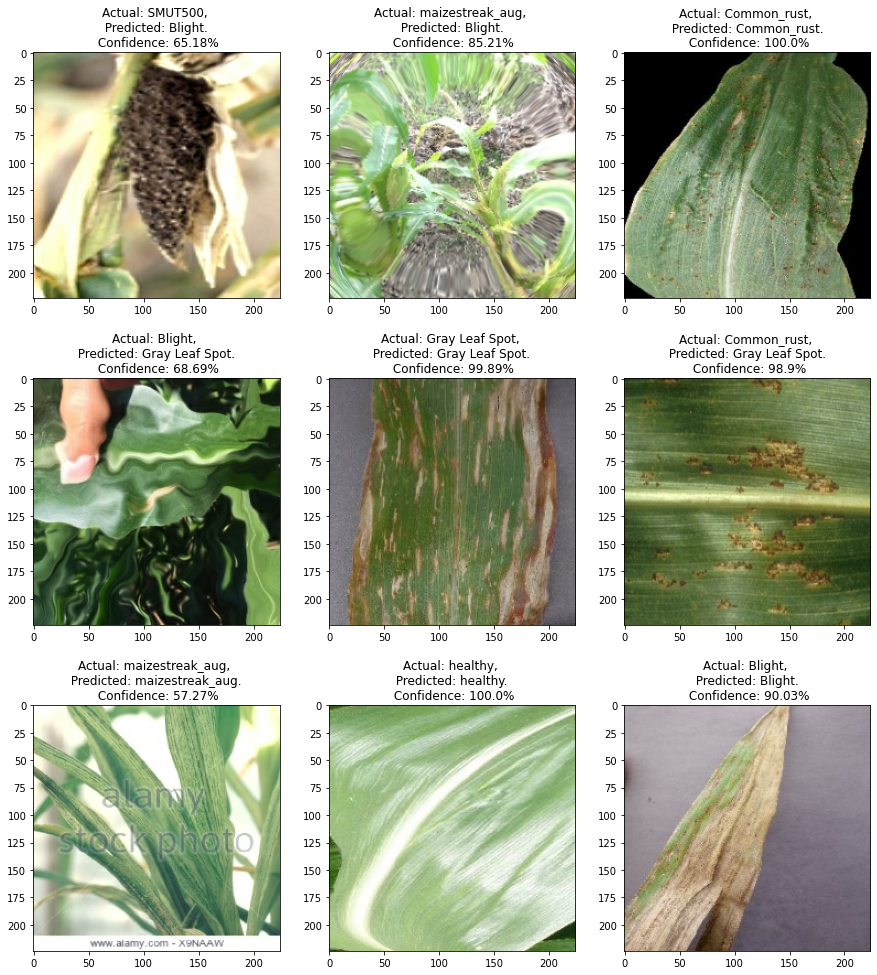

In [ ]:
# predict 9 images using the function above
plt.figure(figsize=(15,17)) # Increase the figure size
for images, labels in test_path.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1) # Use a subplot function to display all the nine predicted images
    plt.imshow(images[i].numpy().astype("uint8"))
    
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")

    plt.axis = "off" # Remove the axis values

In [ ]:
# Create a folder in your local machine and save your model using the code below
model_version=1
model.save(f"../models{model_version}")

In [ ]:
# Saving the model
import tensorflow as tf
from keras.models import load_model
model.save('MobileNet_Epoch_20')
model.save('MobileNet_Epoch_20.h5')
model.save('MobileNet_Epoch_20.js')
model.save('MobileNet_Epoch_20.pd')

INFO:tensorflow:Assets written to: MobileNet_Epoch_20/assets
INFO:tensorflow:Assets written to: MobileNet_Epoch_20.js/assets
INFO:tensorflow:Assets written to: MobileNet_Epoch_20.pd/assets


* We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

* By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last global_average_pooling layer.

In [ ]:
#Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
#his setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has 88 layers total.

x = mobile.layers[-6].output

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 10,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
300/300 - 27s - loss: 0.5853 - acc: 0.7957 - val_loss: 0.6135 - val_acc: 0.8152
Epoch 2/10
300/300 - 23s - loss: 0.2502 - acc: 0.9127 - val_loss: 0.2648 - val_acc: 0.9091
Epoch 3/10
300/300 - 23s - loss: 0.1728 - acc: 0.9417 - val_loss: 0.2674 - val_acc: 0.9061
Epoch 4/10
300/300 - 23s - loss: 0.1279 - acc: 0.9613 - val_loss: 0.3359 - val_acc: 0.8939
Epoch 5/10
300/300 - 23s - loss: 0.1119 - acc: 0.9693 - val_loss: 0.3228 - val_acc: 0.8848
Epoch 6/10
300/300 - 23s - loss: 0.0865 - acc: 0.9753 - val_loss: 0.2639 - val_acc: 0.9182
Epoch 7/10
300/300 - 23s - loss: 0.0739 - acc: 0.9837 - val_loss: 0.2863 - val_acc: 0.9212
Epoch 8/10
300/300 - 23s - loss: 0.0632 - acc: 0.9843 - val_loss: 0.2790 - val_acc: 0.9182
Epoch 9/10
300/300 - 23s - loss: 0.0557 - acc: 0.9870 - val_loss: 0.2999 - val_acc: 0.9045
Epoch 10/10
300/300 - 23s - loss: 0.0489 - acc: 0.9880 - val_loss: 0.3435 - val_acc: 0.8909


acc,0.988
best_epoch,5
best_val_loss,0.26394
epoch,9
loss,0.0489
val_acc,0.89091
val_loss,0.34346


acc,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▁▁▁▁▁
val_acc,▁▇▇▆▆███▇▆
val_loss,█▁▁▂▂▁▁▁▂▃


In [ ]:
test_labels_2 = test_path.classes
predictions_2 = model.predict(x=test_batches, steps=len(test_path), verbose=0)

AttributeError: ignored

In [ ]:
tf.keras.applications.MobileNetV3Small(
    input_shape=None, alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, classes=1000, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax',
    include_preprocessing=True
)

10747904/10734624 [==============================] - 0s 0us/step


### Increase Epoch

In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model_epoch50',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 50,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
300/300 - 27s - loss: 1.6690 - acc: 0.6950 - val_loss: 1.3431 - val_acc: 0.7530
Epoch 2/50
300/300 - 24s - loss: 1.0148 - acc: 0.7500 - val_loss: 1.0265 - val_acc: 0.7879
Epoch 3/50
300/300 - 24s - loss: 0.8067 - acc: 0.7807 - val_loss: 0.8043 - val_acc: 0.8061
Epoch 4/50
300/300 - 23s - loss: 0.6029 - acc: 0.8083 - val_loss: 0.6877 - val_acc: 0.8152
Epoch 5/50
300/300 - 23s - loss: 0.5315 - acc: 0.8300 - val_loss: 0.5913 - val_acc: 0.8258
Epoch 6/50
300/300 - 23s - loss: 0.4649 - acc: 0.8437 - val_loss: 0.5325 - val_acc: 0.8424
Epoch 7/50
300/300 - 23s - loss: 0.3935 - acc: 0.8567 - val_loss: 0.4851 - val_acc: 0.8485
Epoch 8/50
300/300 - 23s - loss: 0.3672 - acc: 0.8600 - val_loss: 0.4446 - val_acc: 0.8530
Epoch 9/50
300/300 - 23s - loss: 0.3212 - acc: 0.8767 - val_loss: 0.4272 - val_acc: 0.8515
Epoch 10/50
300/300 - 23s - loss: 0.2943 - acc: 0.8867 - val_loss: 0.3976 - val_acc: 0.8606
Epoch 11/50
300/300 - 23s - loss: 0.2568 - acc: 0.9087 - val_loss: 0.3821 - val_acc: 0.86

acc,0.99333
best_epoch,22
best_val_loss,0.31673
epoch,49
loss,0.02113
val_acc,0.89848
val_loss,0.38882


acc,▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▃▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████▇█▇█▇███
val_loss,█▆▄▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

{'Blight': 0,
 'Common_rust': 1,
 'Gray Leaf Spot': 2,
 'SMUT500': 3,
 'healthy': 4,
 'maizestreak_aug': 5}

Confusion matrix, without normalization
[[22  1  4  0  0  3]
 [ 1 25  4  0  0  0]
 [ 1  2 27  0  0  0]
 [ 0  0  0 29  0  1]
 [ 0  0  0  0 30  0]
 [ 0  0  0  0  0 30]]


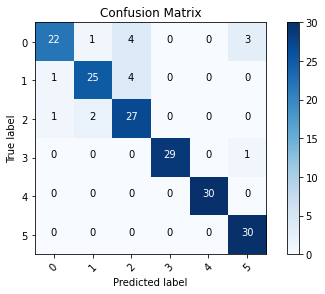

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.89      0.83      0.86        30
           2       0.77      0.90      0.83        30
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        30
           5       0.88      1.00      0.94        30

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.90       180
weighted avg       0.91      0.91      0.90       180



we saved the best model 

In [ ]:
#saving the model
from keras.models import load_model

model.save('mobile_model')

INFO:tensorflow:Assets written to: mobile_model/assets


## **Optimization**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.000001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_ Adagrad_epoch50',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                    "Layers" : 10,
                     "epochs": 50,
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adagrad(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
300/300 - 27s - loss: 1.6336 - acc: 0.3580 - val_loss: 1.4826 - val_acc: 0.4773
Epoch 2/50
300/300 - 24s - loss: 1.4335 - acc: 0.5103 - val_loss: 1.3344 - val_acc: 0.5712
Epoch 3/50
300/300 - 24s - loss: 1.3160 - acc: 0.5940 - val_loss: 1.2307 - val_acc: 0.6470
Epoch 4/50
300/300 - 24s - loss: 1.2287 - acc: 0.6623 - val_loss: 1.1555 - val_acc: 0.7091
Epoch 5/50
300/300 - 26s - loss: 1.1495 - acc: 0.7037 - val_loss: 1.0944 - val_acc: 0.7318
Epoch 6/50
300/300 - 24s - loss: 1.1041 - acc: 0.7377 - val_loss: 1.0386 - val_acc: 0.7515
Epoch 7/50
300/300 - 24s - loss: 1.0436 - acc: 0.7620 - val_loss: 0.9918 - val_acc: 0.7697
Epoch 8/50
300/300 - 24s - loss: 1.0000 - acc: 0.7940 - val_loss: 0.9549 - val_acc: 0.7924
Epoch 9/50
300/300 - 24s - loss: 0.9610 - acc: 0.8010 - val_loss: 0.9160 - val_acc: 0.8030
Epoch 10/50
300/300 - 24s - loss: 0.9293 - acc: 0.8167 - val_loss: 0.8921 - val_acc: 0.8076
Epoch 11/50
300/300 - 23s - loss: 0.9015 - acc: 0.8227 - val_loss: 0.8632 - val_acc: 0.81

acc,0.924
best_epoch,49
best_val_loss,0.50795
epoch,49
loss,0.48203
val_acc,0.85909
val_loss,0.50795


acc,▁▃▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇███████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▇▆▆▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▄▅▆▆▇▇▇▇▇▇▇▇██████████████████████████
val_loss,█▇▆▆▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁


### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

{'Blight': 0,
 'Common_rust': 1,
 'Gray Leaf Spot': 2,
 'SMUT500': 3,
 'healthy': 4,
 'maizestreak_aug': 5}

Confusion matrix, without normalization
[[18  2  6  0  0  4]
 [ 1 20  7  1  1  0]
 [ 2  1 27  0  0  0]
 [ 0  0  0 29  0  1]
 [ 0  1  0  0 29  0]
 [ 0  1  0  1  0 28]]


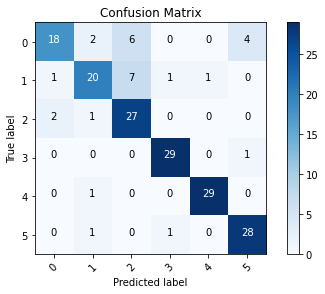

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.80      0.67      0.73        30
           2       0.68      0.90      0.77        30
           3       0.94      0.97      0.95        30
           4       0.97      0.97      0.97        30
           5       0.85      0.93      0.89        30

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [ ]:

p='/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test/Blight/Corn_Blight (125).jpg'


# t = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=p, target_size=(224,224), batch_size=10)

In [ ]:
import numpy as np
from keras.preprocessing import image

img = tf.keras.applications.mobilenet.preprocess_input(img)
img = image.load_img('/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test/Blight/Corn_Blight (125).jpg', target_size = (224,224))
img = np.expand_dims(img, axis = 0)


predict_image=model.predict(img)
predict_image


array([[0.04617503, 0.06770314, 0.8710928 , 0.00356562, 0.00238915,
        0.00907422]], dtype=float32)

In [ ]:
#predicting the image.

top_five_predict = tf.keras.applications.mobilenet.predictions(predict_image,top=1)
top_five_predict

AttributeError: ignored

In [ ]:

preprocessing_function=tf.keras.applications.mobilenet.preprocess_input('/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test/Blight/Corn_Blight (125).jpg')

In [ ]:
Y_pred = model.predict_generator(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
import tensorflow as tf
predicted_categories  = y_pred

### Lower Leerning rate

In [ ]:
# fit() to train the model
wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Adagrad_epoch50',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.00001,
                     "epochs": 60,
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adagrad(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
#run.finish()

### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


## **Optimization2**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-20]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.000001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit() to train the model
wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_SGD_epoch100',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 100,
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.SGD(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
#run.finish()

### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
conf = plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
wandb.log({'confusion_matrix':conf})
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


## Reduce Trainable Layers

In [ ]:
x = mobile.layers[-6].output
# add custom layers
#x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

x = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model2 = keras.Model(inputs=mobile.input, outputs=x)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model2.summary()

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit() to train the model2
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_with_2densee',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.00001,
                     "epochs": 20,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model2.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model2.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model2.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


### Loading the Model to Streamlit

In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.3 MB 4.6 MB/s 
     |████████████████████████████████| 4.3 MB 48.2 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 111 kB 53.2 MB/s 
     |████████████████████████████████| 124 kB 50.3 MB/s 
     |████████████████████████████████| 788 kB 42.7 MB/s 
     |████████████████████████████████| 370 kB 45.0 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=47f8a6e16dc2e05e6595f883915227bd80823e0287d895cb4cc72f4e3377d9e0
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfu

In [ ]:
import cv2
import numpy as np
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_v2_preprocess_input
#model_path = "/content/drive/MyDrive/MobileNet_Epoch_20.pd"
model = tf.keras.models.load_model("/content/drive/MyDrive/MobileNet_Epoch_20.pd")

### load file
uploaded_file = st.file_uploader("Choose a image file", type="jpg")
'Blight', 'Common_rust', 'Gray Leaf Spot', 'SMUT500', 'healthy', 'maizestreak_aug'
map_dict = {0: 'Common_rust',
            1: 'Gray Leaf Spot',
            2: 'SMUT500',
            3: 'healthy',
            4: 'maizestreak_aug'
            }

if uploaded_file is not None:
    # Convert the file to an opencv image.
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    opencv_image = cv2.imdecode(file_bytes, 1)
    opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(opencv_image,(224,224))
    # Now do something with the image! For example, let's display it:
    st.image(opencv_image, channels="RGB")

    resized = mobilenet_v2_preprocess_input(resized)
    img_reshape = resized[np.newaxis,...]

    Genrate_pred = st.button("Generate Prediction")    
    if Genrate_pred:
        prediction = model.predict(img_reshape).argmax()
        st.title("Predicted Label for the image is {}".format(map_dict [prediction]))

2021-09-26 23:29:31.639446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 23:29:31.650117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 23:29:31.650930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 23:29:31.652880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 23:29:31.653709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S